### Mercedes-Benz Greener Manufacturing 
by Naveen B

### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

#### Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

Check for null and unique values for test and train sets.

Apply label encoder.

Perform dimensionality reduction.

Predict your test_df values using XGBoost.

In [1]:
#Importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Importing Train and Test dataset
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
#Checking the shape of data
print("The Shape of Train data :",train_df.shape)
print("The Shape of Test data :",test_df.shape)

The Shape of Train data : (4209, 378)
The Shape of Test data : (4209, 377)


In [4]:
#Glimpse of train data
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Glimpse of test data
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
#Number of unique values in ID column of train data
train_df.ID.nunique()

4209

In [7]:
#Number of unique values in ID column of test data
test_df.ID.nunique()

4209

In [8]:
# As the "ID" feature in train data is a unique identification of each model lets drop as it doesn't any information to the model
train_df.drop("ID",axis=1,inplace=True)
test_id=test_df.ID #Test_id can be used later to map the predicted time with ID
test_df.drop("ID",axis=1,inplace=True)

In [9]:
#Checking for columns with Zero variance in Train data
zero_var_train=train_df.var()[train_df.var()==0].index.values
print("Total Columns with zero variance in train data is :{} \nThe columns are {}".format(len(zero_var_train),zero_var_train))

Total Columns with zero variance in train data is :12 
The columns are ['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297'
 'X330' 'X347']


In [10]:
#Checking for columns with Zero variance in Test data
zero_var_test=test_df.var()[test_df.var()==0].index.values
print("Total Columns with zero variance in test data is :{} \nThe columns are {}".format(len(zero_var_test),zero_var_test))

Total Columns with zero variance in test data is :5 
The columns are ['X257' 'X258' 'X295' 'X296' 'X369']


In [11]:
#Checking for common columns with Zero variance in Tain & Test data to drop them
if zero_var_train in zero_var_test:
    print("There are common columns with Zero Variance")
else:
    print("There are No common columns with Zero Variance")

There are No common columns with Zero Variance


In [12]:
#Since there are no common columns with zero variance lets keep the columns instead of dropping them as suggested
#Zero variance columns doesn't do much impact on the model,so lets proceed with them

In [13]:
#Checking for unique columns in train data
unique_col_train=train_df.loc[:,train_df.nunique()==1].columns.values
unique_col_train

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [14]:
#The columns with one unqiue value are zero variance columns

In [15]:
#Checking for unique columns in test data
unique_col_test=test_df.loc[:,test_df.nunique()==1].columns.values
unique_col_test

array(['X257', 'X258', 'X295', 'X296', 'X369'], dtype=object)

In [16]:
#The columns with one unqiue value are zero variance columns

In [17]:
#Checking for common columns with one unique value in Tain & Test data to drop them
if unique_col_train in unique_col_test:
    print("There are common columns with one Unique value")
else:
    print("There are No common columns with one Unique value")
#Lets keep them

There are No common columns with one Unique value


In [18]:
#Checking for Null values in train data
np.sum(train_df.isnull().sum()) 

0

In [19]:
#Checking for Null values in train data
np.sum(test_df.isnull().sum())

0

In [20]:
#There is no null value in both train and test data

In [21]:
#Summary for Categorical columns in train data
train_df.describe(include="object")

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [22]:
#Summary for Categorical columns in test data
test_df.describe(include="object")

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [23]:
#Catergorical columns
cat_col=train_df.select_dtypes("object").columns.values
cat_col

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [24]:
#Label Encoding the categorical columns in train and test dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    combined=pd.concat([train_df[col],test_df[col]],axis=0).astype("str")
    le.fit(combined) #Fitting for both data as unique categorical column value differs for both train and test data
    train_df[col]=le.transform(train_df[col].astype("str")) #Transforming train data
    test_df[col]=le.transform(test_df[col].astype("str")) #Transforming test data

In [25]:
#Glimpse at Label Encoded train data
train_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,37,23,20,0,3,27,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,37,21,22,4,3,31,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,24,24,38,2,3,30,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,24,21,38,5,3,30,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,24,23,38,5,3,14,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Glimpse at Label Encoded test data
test_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
#Splitting data in to features and Label
x=train_df.drop("y",axis=1)
y=train_df.y

In [28]:
#Splitting the train_df to train and validation data
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=.2,random_state=42)
print("Shape of x_train :{}\nShape of x_valid :{}\nShape of y_train :{}\nShape of y_valid :{}".format(x_train.shape,
                                                                                                      x_valid.shape,
                                                                                                      y_train.shape,
                                                                                                      y_valid.shape))

Shape of x_train :(3367, 376)
Shape of x_valid :(842, 376)
Shape of y_train :(3367,)
Shape of y_valid :(842,)


In [29]:
#Reducing the dimension using PCA with overall 98% varaince
from sklearn.decomposition import PCA
pca=PCA(.98,svd_solver="full")
pca.fit(x) #Fitting to x as it has data of both train and validation 

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [30]:
# Number of components
print("Total Number of components which exibits {}% of varaince is : {} ".format(pca.n_components*100,pca.n_components_))

Total Number of components which exibits 98.0% of varaince is : 12 


In [31]:
#Explained varaince ratio of the pca
pca.explained_variance_ratio_

array([0.40868988, 0.21758508, 0.13120081, 0.10783522, 0.08165248,
       0.0140934 , 0.00660951, 0.00384659, 0.00260289, 0.00214378,
       0.00209857, 0.00180388])

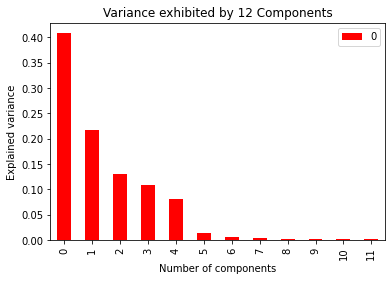

In [32]:
#Plotting the Explained varaince ratio to insight on varaince exhibited by each variable
pd.DataFrame(pca.explained_variance_ratio_).plot(kind="bar",color="red",title="Variance exhibited by 12 Components");
plt.xlabel("Number of components")
plt.ylabel("Explained variance");

In [33]:
#From the plot its evident that 6 componet explains most of the variance i.e around 94%

In [34]:
#Tranforming the train, validation and test data
x_train_pca=pd.DataFrame(pca.transform(x_train))
x_valid_pca=pd.DataFrame(pca.transform(x_valid))
test_pca=pd.DataFrame(pca.transform(test_df))

In [35]:
# Creating XG Boost module
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:linear',learning_rate=0.1)

In [36]:
#Fit the model with train data
model.fit(x_train_pca,y_train)

[08:23:51] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [37]:
#Predict the value for validation data
y_pred=model.predict(x_valid_pca)

In [38]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,r2_score
print("The RMSE value of the train data is",np.sqrt(mean_squared_error(y_train,model.predict(x_train_pca))))
print("\nThe RMSE value of the Validation data is",np.sqrt(mean_squared_error(y_valid,y_pred)))
print("\nThe R squared value of the train data is",r2_score(y_train,model.predict(x_train_pca)))
print("\nThe R squared of the Validation data is",r2_score(y_valid,y_pred))


The RMSE value of the train data is 6.081524364391478

The RMSE value of the Validation data is 8.991893050609491

The R squared value of the train data is 0.7716939319212651

The R squared of the Validation data is 0.4805385673885587


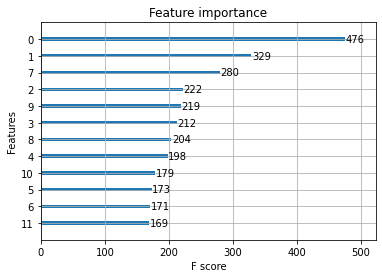

In [39]:
#Feature Importance XG Boost
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [40]:
#Predicitng the time spent on test bench for train_df
time_spend=model.predict(test_pca)
result=pd.DataFrame(time_spend,columns=["Time_Spent"],index=test_id)
result.head(10)

,Time_Spent
ID,
1,76.182564
2,94.497360
3,79.115150
4,76.749641
5,106.808495
8,90.325676
10,102.022964
11,100.731956
12,116.770111


In [41]:
print("="*78 + "  END  " + "="*79)

==============================================================================  END  ===============================================================================
